## Heatmap

In [2]:
# import pkgs
%load_ext autoreload
%autoreload 2
import sys
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 100)
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = 'darkgrid', color_codes = True)
sns.set_context("notebook", font_scale = 1.1)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = 12, 8
%config InlineBackend.figure_format = "retina"
pd.options.display.max_columns = None 
pd.options.display.max_rows = None 
import utils
import data
import features
import models
import viz
import geopandas as gpd

### Download data

In [3]:
#url = 'https://www.python.org/static/opengraph-icon-200x200.png'
#url = 'https://www.freemaptools.com/download/outcode-postcodes/postcode-outcodes.csv'
#url = 'https://datashare.is.ed.ac.uk/bitstream/handle/10283/2597/GB_Postcodes.zip?sequence=1&isAllowed=y'
#import urllib
#import requests
#urllib.request.urlretrieve(url, "vasan-GB-Postcode.zip")
#file_name = 'GB_Postcodes.zip'
#url = 'https://datashare.is.ed.ac.uk/bitstream/handle/10283/2597/GB_Postcodes.zip?sequence=1&isAllowed=y' #url for the GB_Postcodes.zip
#data.downloading_scripts(file_name,url)


#from zipfile import ZipFile
# Create a ZipFile Object and load sample.zip in it
#with ZipFile('vasan-GB-Postcode.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   #zipObj.extractall('temp-download')
#file_name = 'GB_Postcodes.zip'
#data.unzipping_zip_files(file_name)

#file_name = 'postcode_outcodes.csv'
#url = 'https://www.freemaptools.com/download/outcode-postcodes/postcode-outcodes.csv' #url for postcodes and their lat, long values
#data.downloading_scripts(file_name,url)

#dir_name = utils.path_to('src', 'data','GB_Postcodes')
#file_name = 'PostalDistrict.shp'
#file_path=os.path.join(dir_name,file_name)
#GB_PoD_df=gpd.read_file(file_path)

#London_PoD_df=GB_PoD_df[GB_PoD_df['PostArea'].isin(['EC', 'WC', 'E', 'N', 'NW', 'SE', 'SW', 'W'])]

# SAVE
#London_PoD_df.set_index('PostDist', inplace = True)
# pickle.dump(London_PoD_df, file=open('../data/interim/london_shape.bin','wb'))

file downloaded


### Load data

In [3]:
# get data
df = pd.read_feather(utils.path_to('data', 'interim', 'df_clean.feather'))
df, feature_names  = features.generate_features(df)

Timed categorising: earliest_pickup_time
Timed categorising: delivery_deadline
Unchanged features: show_on_board, is_first_war_job, temp, feels_like, humidity, wind_speed, clouds_all, is_daytime
Engineering individual features
Log transforming: distance, initial_time_buffer, estimated_journey_time, courier_earnings_calc, size_min, size_med, size_max, weight, volume, size_min_max
Minimum of initial_time_buffer is less or equal to 0: -12839.0, adding constant of 12840.0 prior to log.
Minimum of courier_earnings_calc is less or equal to 0: -5904.46, adding constant of 5905.46 prior to log.
One hot encoding: is_food, is_fragile, is_liquid, is_not_rotatable, is_glass, is_baked, is_flower, is_alcohol, is_beef, is_pork
One hot encoding: vehicle_type, job_priority, weather_cats, earliest_pickup_time_month, earliest_pickup_time_day, earliest_pickup_time_hour, pickup_zone, delivery_zone
Cyclic encoding: earliest_pickup_time
Cyclic encoding: delivery_deadline


### Heatmap

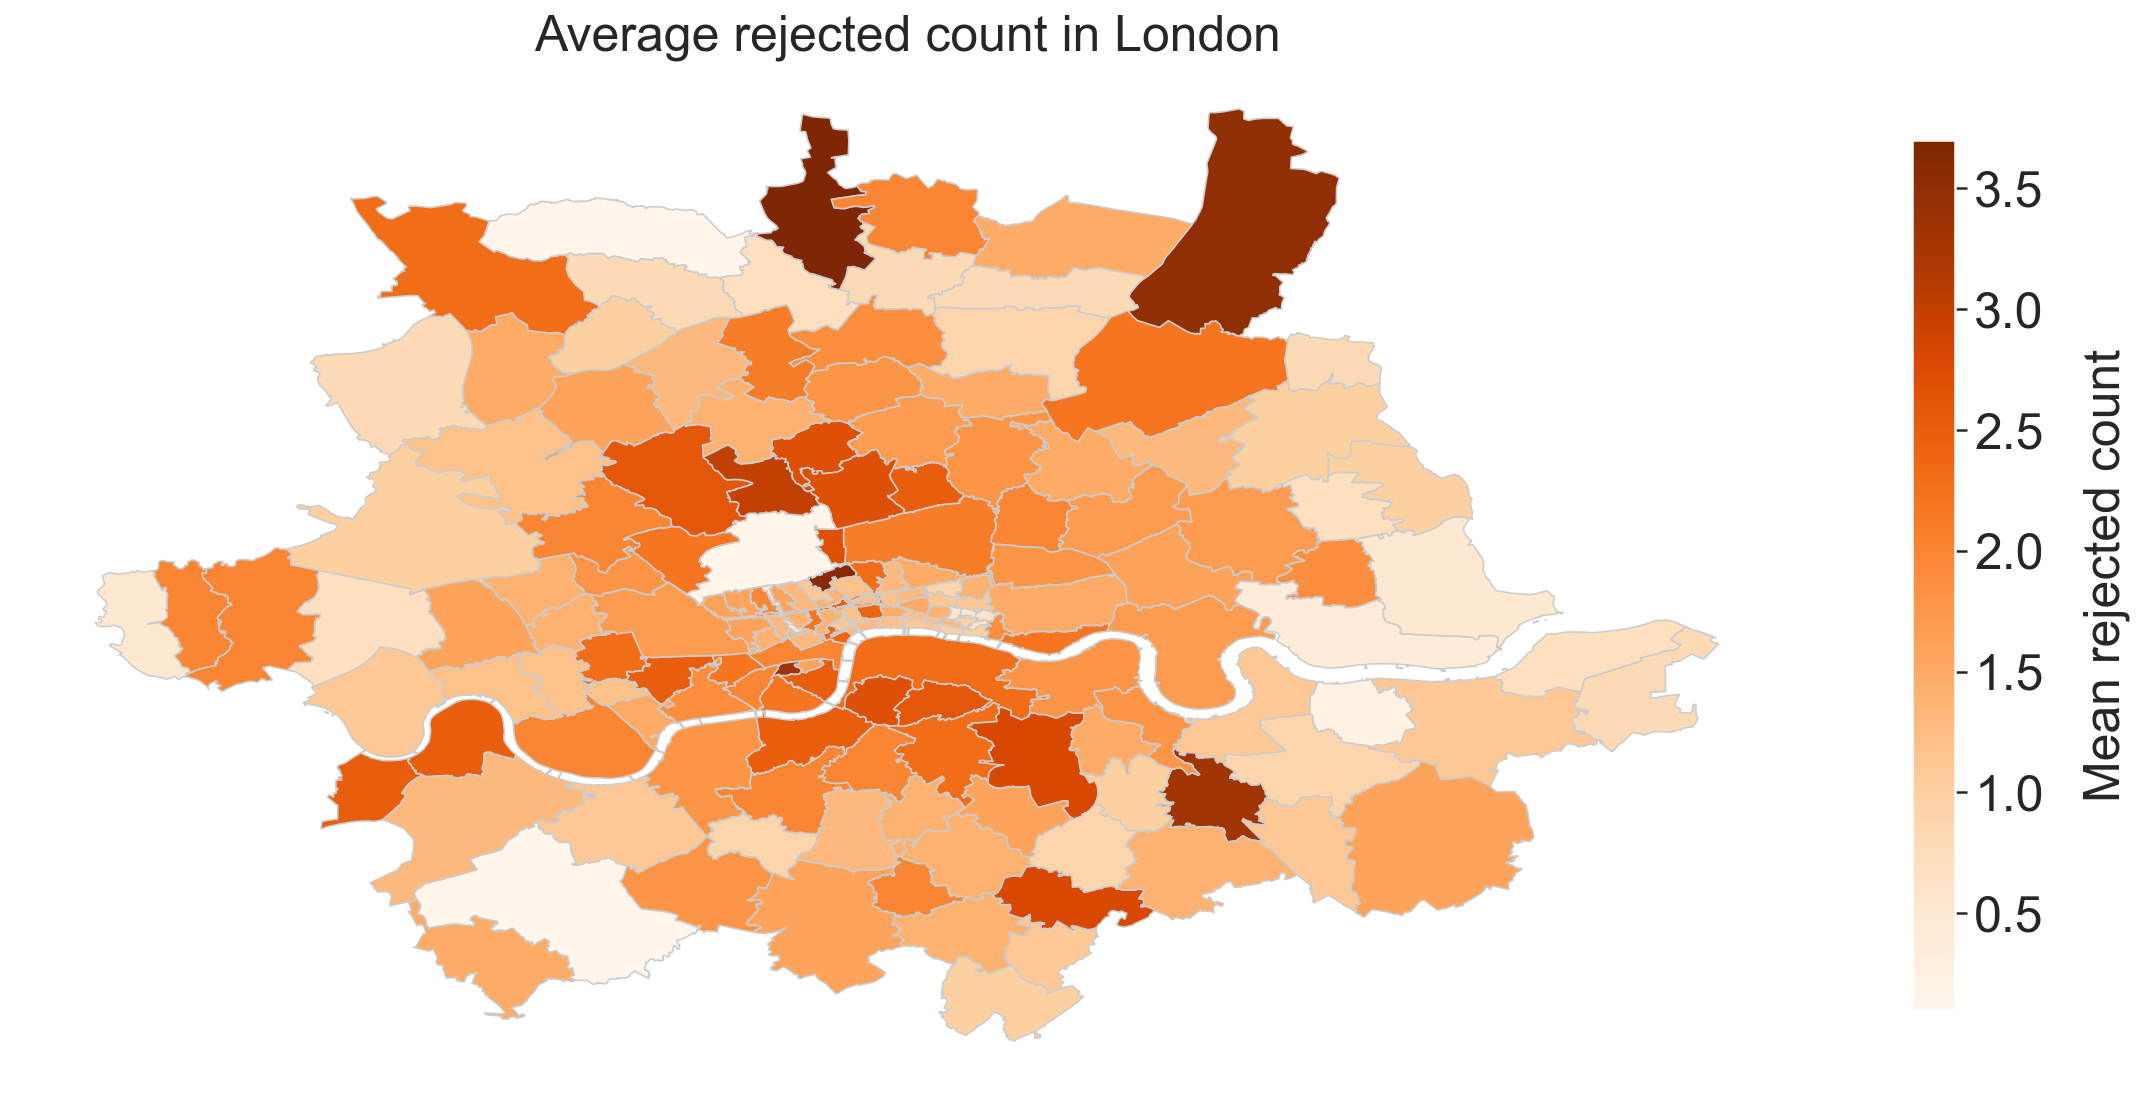

In [21]:
import viz

# get heatmap file
hm_gdb = viz.get_postcode_heatmap(df, target_str='rejected_count')

# plot heatmap
fig, ax =plt.subplots(1, figsize=(20,20))
h = hm_gdb.plot(column='rejected_count', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8')
#hm_gdb.apply(lambda x:
#             ax.annotate(s=x['rejected_count'], xy=x.geometry.centroid.coords[0], ha='center', size=30),axis=1)
plt.title('Average rejected count in London',fontdict={'fontsize':25, 'fontweight': 6})

ax.axis('off')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=hm_gdb.rejected_count.min(), 
                                                              vmax=hm_gdb.rejected_count.max()))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm, shrink=0.4)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('Mean rejected count', rotation=90, fontsize=25)
cbar.ax.get_yaxis().labelpad = 20
plt.show()

fig.savefig('london_2.png', dpi=300)

/Users/felixschrank/anaconda3/envs/s2ds/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


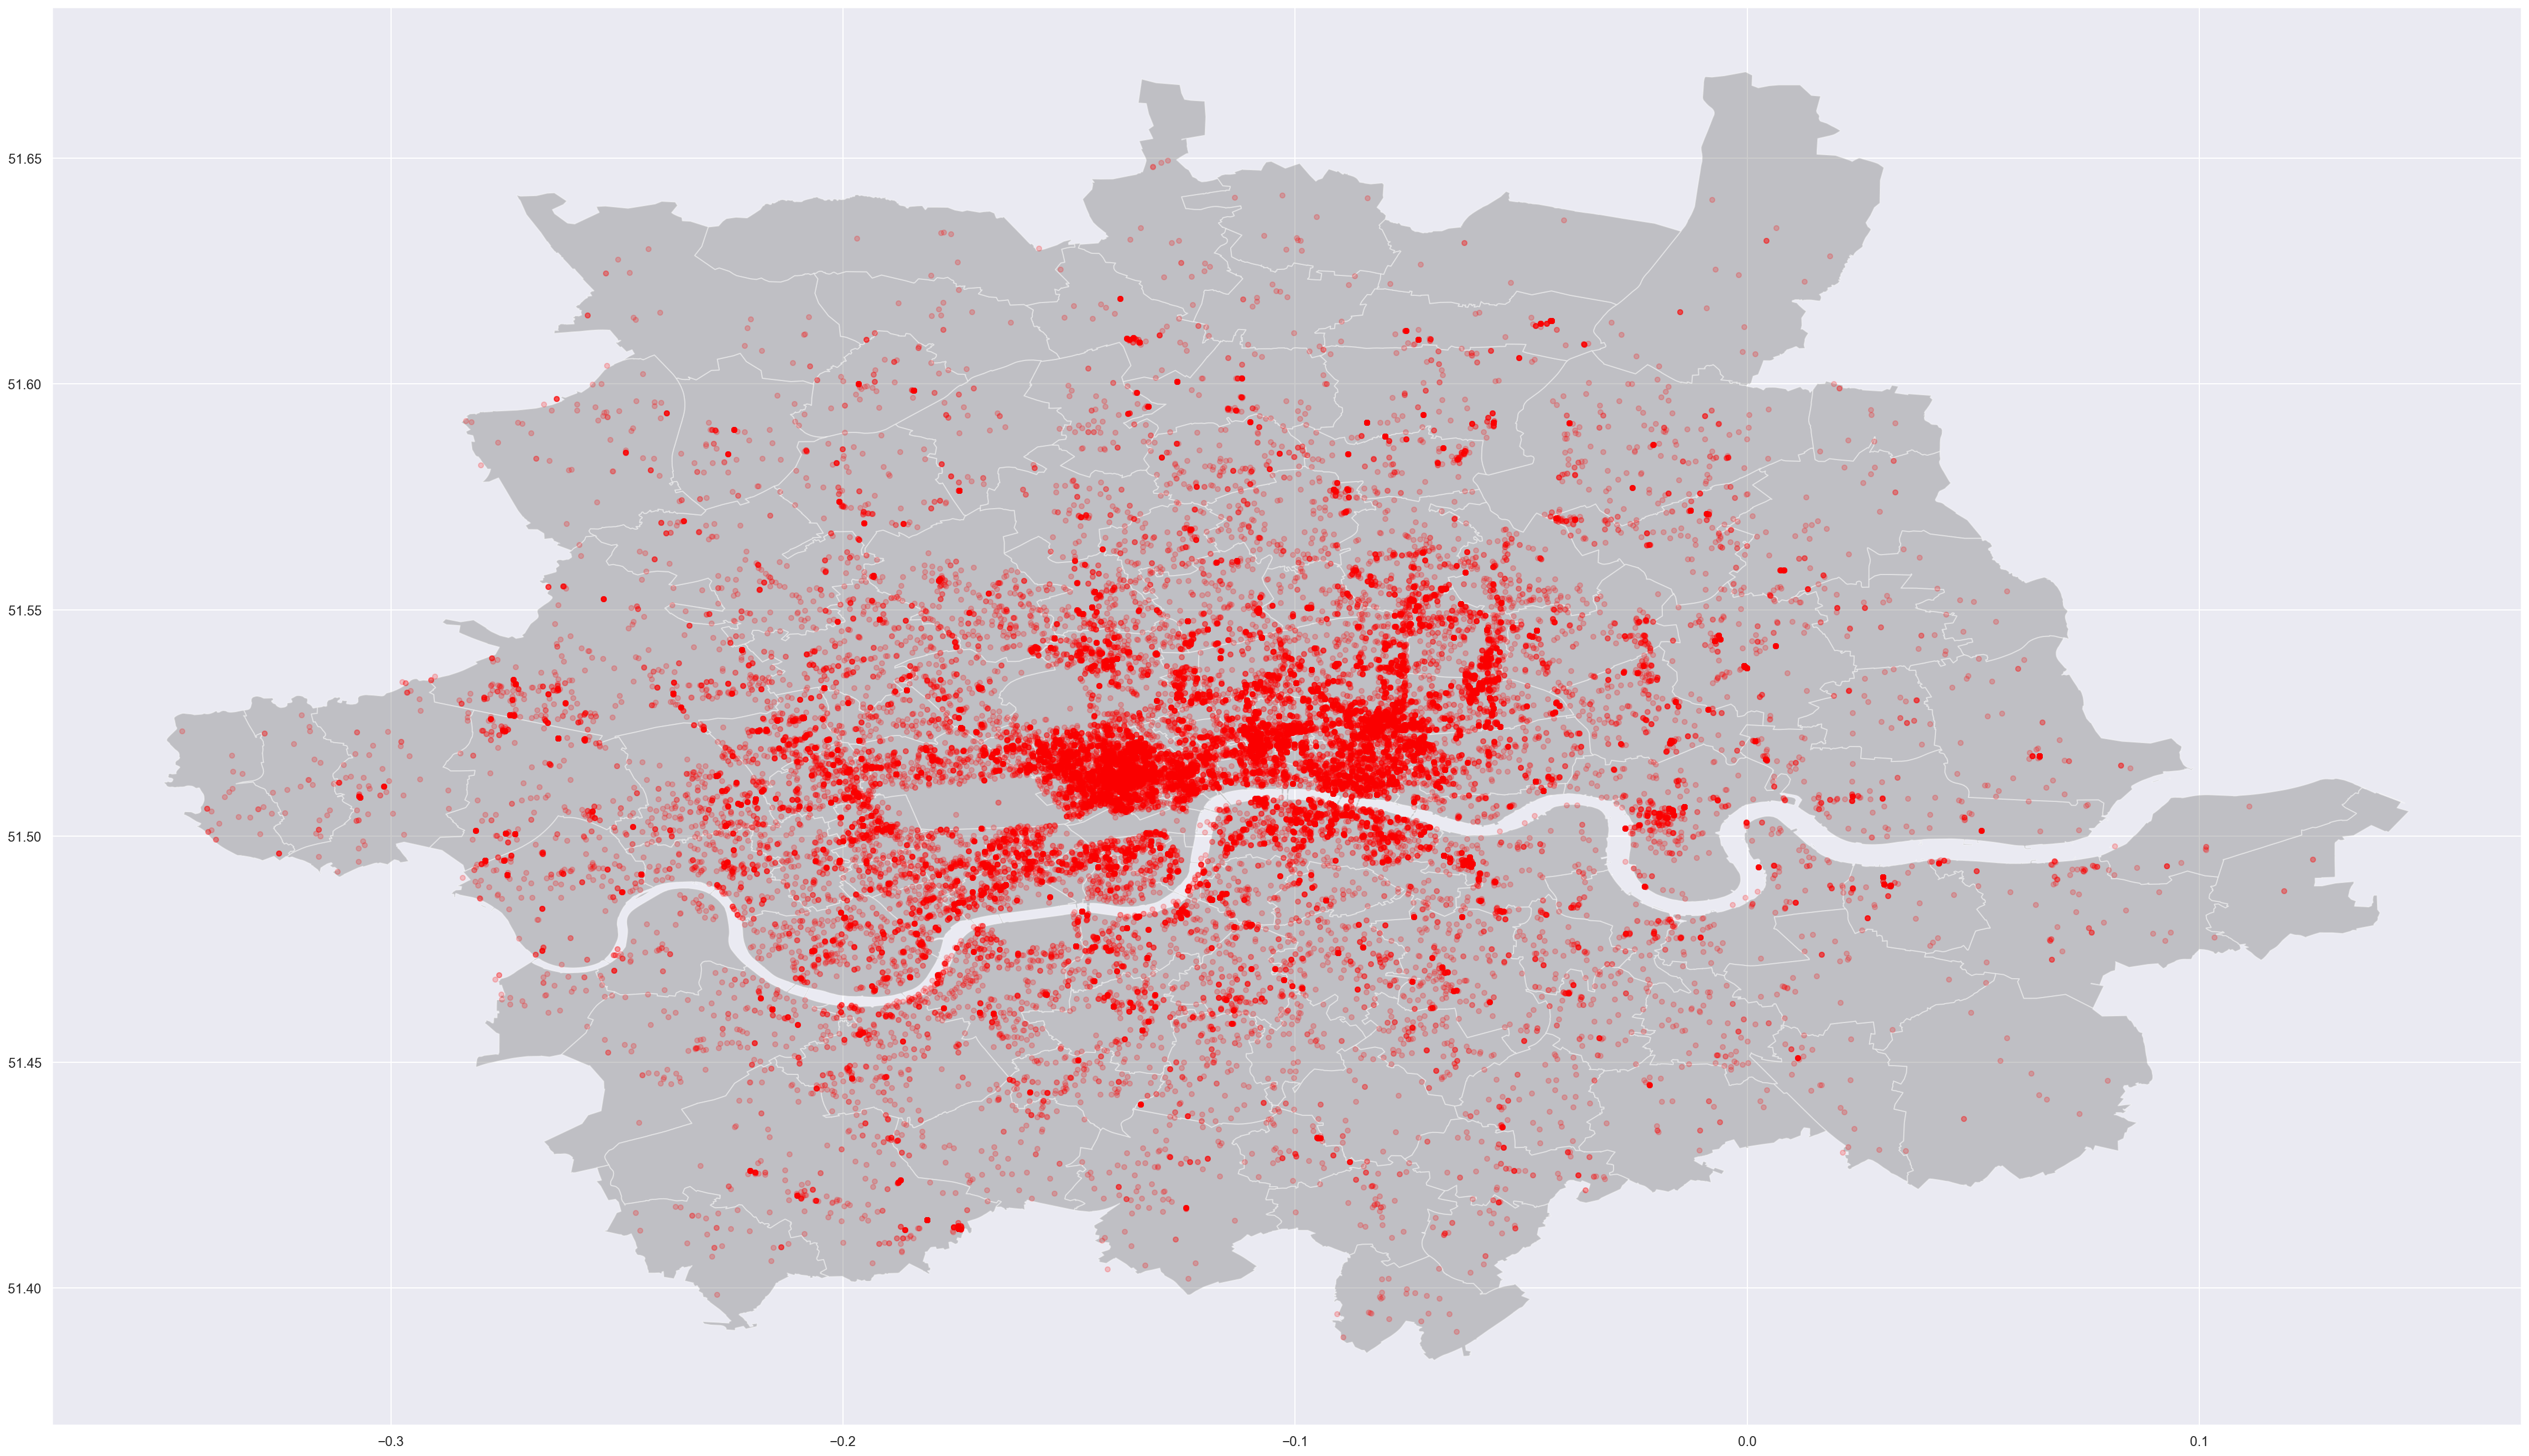

In [26]:
# get heatmap file
gpd, london_shp = viz.get_point_heatmap(df, df['pickup_location_lng'], df['pickup_location_lat'])

fig, ax =plt.subplots(1, figsize=(40,60))
london_shp.plot(ax=ax, color = "grey", alpha=0.4)
gpd.plot(ax=ax,markersize=20,color='red',alpha=0.2)
plt.show()